# Quantitative easing following the Financial Crisis

> **Note the following:** 
> 1. This is *not* meant to be an example of an actual **data analysis project**, just an example of how to structure such a project.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `dataproject.py` file includes a function which can be used multiple times in this notebook.

# Introduction

The aim of this project is to examine the use of Quantitative Easing (QE) by the Federal Reserve Bank of America (FED) in response to the Financial Crisis in 2008 and focus on the first round of QE in the US called QE1. We estimate effect the use of QE1 had on yields of bonds and decompose the effect down into several channels that QE can effect through. We took on this project because we find QE interresting since it was a central response trying to stabilize the financial markets and lowering the interest rates to stimulate growth following the Financial Crisis.

We do so by employing an event study methodology inspired by Krishnamurthy and Vissing-Jorgensen's (2011) approach. Our analysis reveals that the implementation of QE1 had a statistically significant impact on bond yields.

# Data 

To examine the effect of QE we use data from Bloomberg in the period from January 2 2008 until December 30 2011. The data we use are the interest rate on US Treasuries with maturity of 1, 3, 5, 10 and 30 years. We also use the interest rate on agency bonds (Fannie Mae and Freddie Mac) with maturity 3, 5, 10 and 30 years.

# Explaining the imports and merging of data:

In the following code we start by importing required libraries such as pandas, numpy, matplotlib, and ipywidgets. Furthermore we import a module named "dataproject" and load the autoreload extension package. This package allows the code to automatically reload any modified modules when the code is run.

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

from IPython.display import display

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2
#%matplotlib widget

# user written modules
import dataproject

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Read and merge data

In order to analyze the spread between treasuries and agency bonds we need to merge the two datasets together.

We import the data. We do this with CVS files. The code reads our two data CVS files named 'Treasuries.csv' and 'Agency.csv' using pandas' read_csv() function. We than stores them in two separate data frames named 'df_tres' and 'df_agency'. We use the merge()' function to merge the two data frames int a single data fram named 'df_merged' based on the 'Date' column.

Finally we showcase the data by printing the first 10 rows of the merged data frame 'df_merged.

In [102]:
# Make csv files to datafranes and merge datasets
df_tres = pd.read_csv('Treasuries.csv', sep=";")
#print(df_tres.head(10))
df_agency = pd.read_csv('Agency.csv', sep=";")
print(df_tres.columns)
print(df_agency.columns)
df_merged = df_tres.merge(df_agency, on="Date", how='inner')
df_merged.sort_values(by=['Number'], ascending=False)
df_merged["Date"] = pd.to_datetime(df_merged["Date"], format="%d.%m.%Y")
display (df_merged.head(10))

# Change variable names

Index(['Date', '1 year', '3 year', '5 year', '10 year', '30 year', 'Number',
       'Citi surprise'],
      dtype='object')
Index(['Date', 'Freddie Mac 10', 'Fannie Mae 10', 'Fannie Mae 30',
       'Freddie Mac 30', 'Freddie Mac 5', 'Fannie Mae 5', 'Freddie Mac 3',
       'Fannie Mae 3'],
      dtype='object')


,Date,1 year,3 year,5 year,10 year,30 year,Number,Citi surprise,Freddie Mac 10,Fannie Mae 10,Fannie Mae 30,Freddie Mac 30,Freddie Mac 5,Fannie Mae 5,Freddie Mac 3,Fannie Mae 3
0,2011-12-30,12,36,83,189,289,1001,6850,166,188,319,321,109,113,60,60
1,2011-12-29,12,41,88,191,290,1000,6940,169,191,320,321,114,118,65,66
2,2011-12-28,12,42,91,193,291,999,6950,173,194,321,322,118,121,68,68
3,2011-12-27,12,45,96,202,304,998,7120,181,202,334,336,124,127,72,73
4,2011-12-23,12,45,97,203,305,997,7120,181,202,335,337,124,127,72,73
5,2011-12-22,12,41,91,197,299,996,6940,177,197,329,331,119,122,69,69
6,2011-12-21,13,40,91,198,300,995,7050,176,203,330,332,119,123,68,68
7,2011-12-20,12,39,88,194,293,994,7390,175,197,323,326,120,123,68,69
8,2011-12-19,11,36,82,182,279,993,7340,167,191,311,312,116,119,66,67
9,2011-12-16,11,35,81,186,286,992,7550,169,193,318,319,114,118,66,65


## Explore each data set

In order to be able to **explore the raw data**, you may provide **static** and **interactive plots** to show important developments 

**Interactive plot** :

The following code is creating an interactive plot using the Matplotlib and ipywidgets libraries. It starts by enabling the "widget" backend for Matplotlib by running the command '%matplotlib widget'.
The interactive plot depicts the US Treasuries alongside the agency bonds issued by Fannie Mae, during the time span of January 2008 to January 2012.

SelectMultiple(description='Select variables:', index=(0,), options=('1 year', '3 year', '5 year', '10 year', …

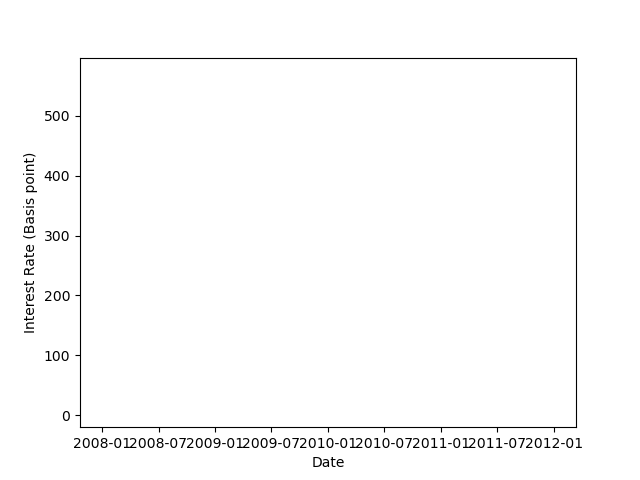

In [103]:
# Load data
variable_names = ['1 year', '3 year', '5 year', '10 year', '30 year', 'Fannie Mae 30', 'Fannie Mae 10', 'Fannie Mae 5']

# Define initial plot
fig, ax = plt.subplots()
lines = []
for variable_name in variable_names:
    line, = ax.plot(df_merged['Date'], df_merged[variable_name], label=variable_name, visible=False)
    lines.append(line)

# Define callback function to update plot
def update_plot(change):
    selected_variables = change.new
    for i, line in enumerate(lines):
        if variable_names[i] in selected_variables:
            line.set_visible(True)
        else:
            line.set_visible(False)
    ax.legend([var for var in variable_names if var in selected_variables], loc='upper right')  # Update legend with selected variables
    fig.canvas.draw_idle()

# Set x and y labels
ax.set_xlabel('Date')
ax.set_ylabel('Interest Rate (Basis point)')

# Define widget
select_multiple = widgets.SelectMultiple(options=variable_names, value=[variable_names[0]], description='Select variables:')
select_multiple.observe(update_plot, names='value')

# Display plot and widget
display(select_multiple)

Our interactive graph can show the interest rate on US Treasuries with maturity 1, 3, 5, 10 and 30 years and also show the interest rate on agency bonds (Freddie Mac and Fannie Mae) with maturity 3, 5, 10 and 30 years. In our interactive graph you can choose multiple interest rates and compare them, so you can see the changes in the interest rates and how they compare especially around the annoucements.

We now make a new variable that is the spread between Agency bond and treasuries with same duration. We then display the spread in a figure and create dummy variables for the eventdays in the analysis.

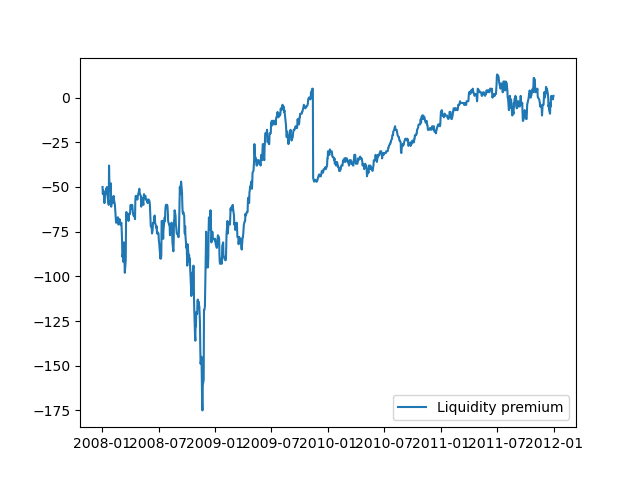

In [104]:
df_merged['liquidity channel 10'] = df_merged['10 year'] - df_merged['Fannie Mae 10']
fig1, ax1 = plt.subplots()
ax1.plot(df_merged['Date'], df_merged['liquidity channel 10'], label='Liquidity premium')
ax1.legend(loc='lower right')

# Set two specific dates
date1 = '2008-11-25'
date2 = '2008-11-26'
date3 = '2008-12-01'
date4 = '2008-12-02'
date5 = '2008-12-16'
date6 = '2008-12-17'
date7 = '2009-01-28'
date8 = '2009-01-29'
date9 = '2009-03-18'
date10 = '2009-03-19'

# Create a dummy variable based on the two dates
df_merged['QE11'] = 0
df_merged.loc[(df_merged['Date'] == date1) | (df_merged['Date'] == date2), 'QE11'] = 1
df_merged['QE12'] = 0
df_merged.loc[(df_merged['Date'] == date3) | (df_merged['Date'] == date4), 'QE12'] = 1
df_merged['QE13'] = 0
df_merged.loc[(df_merged['Date'] == date5) | (df_merged['Date'] == date6), 'QE13'] = 1
df_merged['QE14'] = 0
df_merged.loc[(df_merged['Date'] == date7) | (df_merged['Date'] == date8), 'QE14'] = 1
df_merged['QE15'] = 0
df_merged.loc[(df_merged['Date'] == date9) | (df_merged['Date'] == date10), 'QE15'] = 1

# Analysis

In our event study, we focus on 5 announcement dates :

- On November 25, 2008, the FED announces the creation of a program to purchase 500 billion dollar of MBS and 100 billion dollar of agency debt.

- On December 1, 2008, the FED Chairman Ben Bernanke gives a speech where he addresses and elaborates on the FED's plans to use unconventional monetary policy and announces that the FED plans to purchase large quantities of long-term US government bonds.

- On December 16, 2008, the FED issues a statement that its policy will focus on supporting financial markets through MBS purchases. The FED will also investigate the benefits of purchasing long-term US government bonds and generally explore options for supporting credit markets and economic activity through the FED's balance sheet. The FED establishes an upper and lower bound for the Federal Funds Rate target range, which is set between 0% and 0.25%.

- On January 28, 2009, the FED reiterates its commitment to expand the program of purchasing agency debt and MBS. The FED also maintains the target range for the Federal Funds Rate between 0% and 0.25%, which was established on December 16, 2008.

- On March 18, 2009, the FED announces the specific amounts it will purchase of various assets, including $300 billion of long-term US government bonds. The FED also sets an upper limit on its purchases.


We assume the efficient market hypothesis so the investors believes about the announcement will be shown in the yield when the announcement is made. We have chosen a 2 day interval for the event days so we assume that the effect from QE will be fully intergrated in the pricens and yield within the interval.

In [105]:
import statsmodels.api as sm

# Define the dependent variable
y = df_merged['liquidity channel 10']

# Define the independent variables, including the dummies
X = df_merged[['QE11', 'QE12', 'QE13', 'QE14', 'QE15']]

# Add a constant term to the independent variables
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X,).fit()

# Print the model summary
print(model.summary())

                             OLS Regression Results                             
Dep. Variable:     liquidity channel 10   R-squared:                       0.027
Model:                              OLS   Adj. R-squared:                  0.023
Method:                   Least Squares   F-statistic:                     5.610
Date:                  Fri, 19 May 2023   Prob (F-statistic):           4.16e-05
Time:                          15:40:40   Log-Likelihood:                -4891.4
No. Observations:                  1000   AIC:                             9795.
Df Residuals:                       994   BIC:                             9824.
Df Model:                             5                                         
Covariance Type:              nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -35.2596      1.027

# Conclusion

From our event study we see that every announcement had a negative effect on the interest rate spread between the 10-year treasuries and the 10-year agency bond which also can be seen with the interactive graph. According to our model the third announcement doesn’t have a significant effect on the interest rate spread on a five-pct. level. The fifth announcement almost have a significant effect at a five-pct. level. This shows that the QE announcement lowered the interest rate on agency bonds relative to treasuries.